In [1]:
import csv

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 35

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,455 (5.68 KB)

 Trainable params: 1,455 (5.68 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history=model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4844 - loss: 1.4843
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4805 - loss: 1.4837 - val_accuracy: 0.8480 - val_loss: 0.7935
Epoch 2/1000
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5078 - loss: 1.4427
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4807 - loss: 1.5381 - val_accuracy: 0.8480 - val_loss: 0.7866
Epoch 3/1000
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4844 - loss: 1.4754
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4740 - loss: 1.5270 - val_accuracy: 0.8354 - val_loss: 0.7880
Epoch 4/1000
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4688 - loss: 1.4968
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.7890


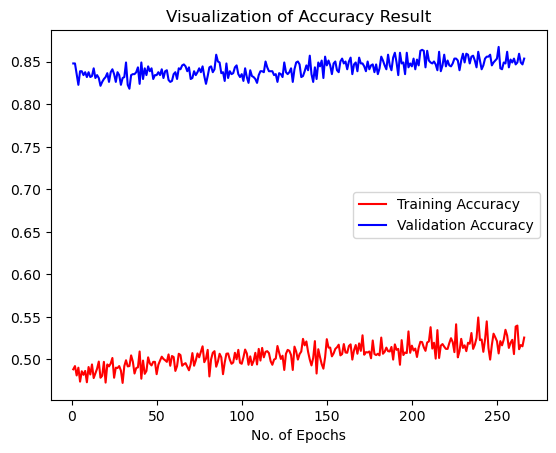

In [15]:
epochs = [i for i in range(1,267)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[2.91656102e-16 7.68461997e-22 3.37718841e-21 2.39441948e-21
 1.41240965e-14 9.29802228e-17 2.22669928e-06 5.08810362e-15
 1.60196338e-25 3.34416086e-06 6.08774099e-13 4.23972019e-16
 3.45259626e-10 3.88984987e-13 6.18024077e-03 4.47960570e-03
 6.85250998e-01 2.58782953e-02 8.69103227e-12 1.89639650e-05
 4.31554270e-18 1.07309721e-01 9.01710093e-02 1.29111580e-14
 4.86798015e-08 5.91725358e-14 8.50905826e-13 4.85387397e-10
 1.46297907e-09 3.94206950e-07 1.64502634e-08 7.85926282e-02
 2.09642085e-03 1.59281626e-05 5.55320290e-10]
16


# Confusion matrix

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


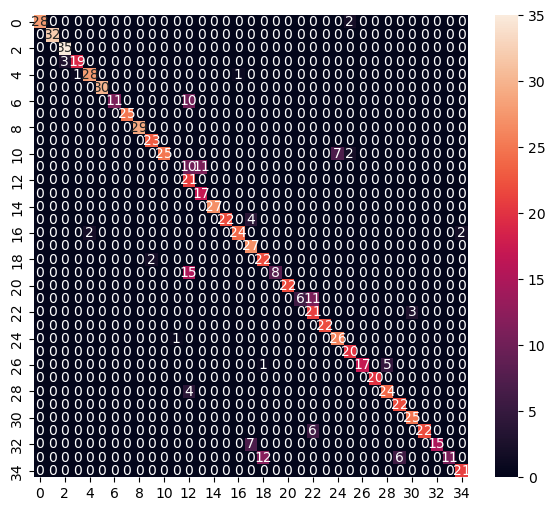

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       1.00      1.00      1.00        32
           2       0.92      1.00      0.96        35
           3       0.95      0.86      0.90        22
           4       0.93      0.93      0.93        30
           5       1.00      1.00      1.00        30
           6       1.00      0.52      0.69        21
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        29
           9       0.92      1.00      0.96        23
          10       1.00      0.74      0.85        34
          11       0.00      0.00      0.00        21
          12       0.35      1.00      0.52        21
          13       0.61      1.00      0.76        17
          14       1.00      1.00      1.00        27
          15       1.00      0.85      0.92        26
          16       0.96      0.86      0.91        28
     

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [20]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\manda\AppData\Local\Temp\tmp633xw4x4\assets


INFO:tensorflow:Assets written to: C:\Users\manda\AppData\Local\Temp\tmp633xw4x4\assets


Saved artifact at 'C:\Users\manda\AppData\Local\Temp\tmp633xw4x4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 35), dtype=tf.float32, name=None)
Captures:
  1801645225936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801699083664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801699085008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801699086160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801699086352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801699086928: TensorSpec(shape=(), dtype=tf.resource, name=None)


7900

# Inference test

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
import time

start_time = time.time()
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
end_time = time.time()

print(f"Inference time: {end_time - start_time:.2f} seconds")


Inference time: 0.00 seconds


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9165724e-16 7.6846498e-22 3.3771884e-21 2.3944104e-21 1.4124097e-14
 9.2979879e-17 2.2266972e-06 5.0881231e-15 1.6019572e-25 3.3441677e-06
 6.0877068e-13 4.2397043e-16 3.4525968e-10 3.8898501e-13 6.1802417e-03
 4.4796043e-03 6.8525112e-01 2.5878325e-02 8.6910331e-12 1.8963967e-05
 4.3155270e-18 1.0730955e-01 9.0171024e-02 1.2911110e-14 4.8679716e-08
 5.9172421e-14 8.5090425e-13 4.8538745e-10 1.4629793e-09 3.9420630e-07
 1.6450295e-08 7.8592636e-02 2.0964253e-03 1.5928166e-05 5.5531818e-10]
16
